# System Architecture Visualization for Research Paper

This notebook creates publication-ready visualizations of the WiFi-based indoor localization system architecture using QUBO optimization for AP selection.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle
import numpy as np

## Architecture 1: High-Level System Pipeline

This diagram shows the complete end-to-end workflow from raw data to performance evaluation.

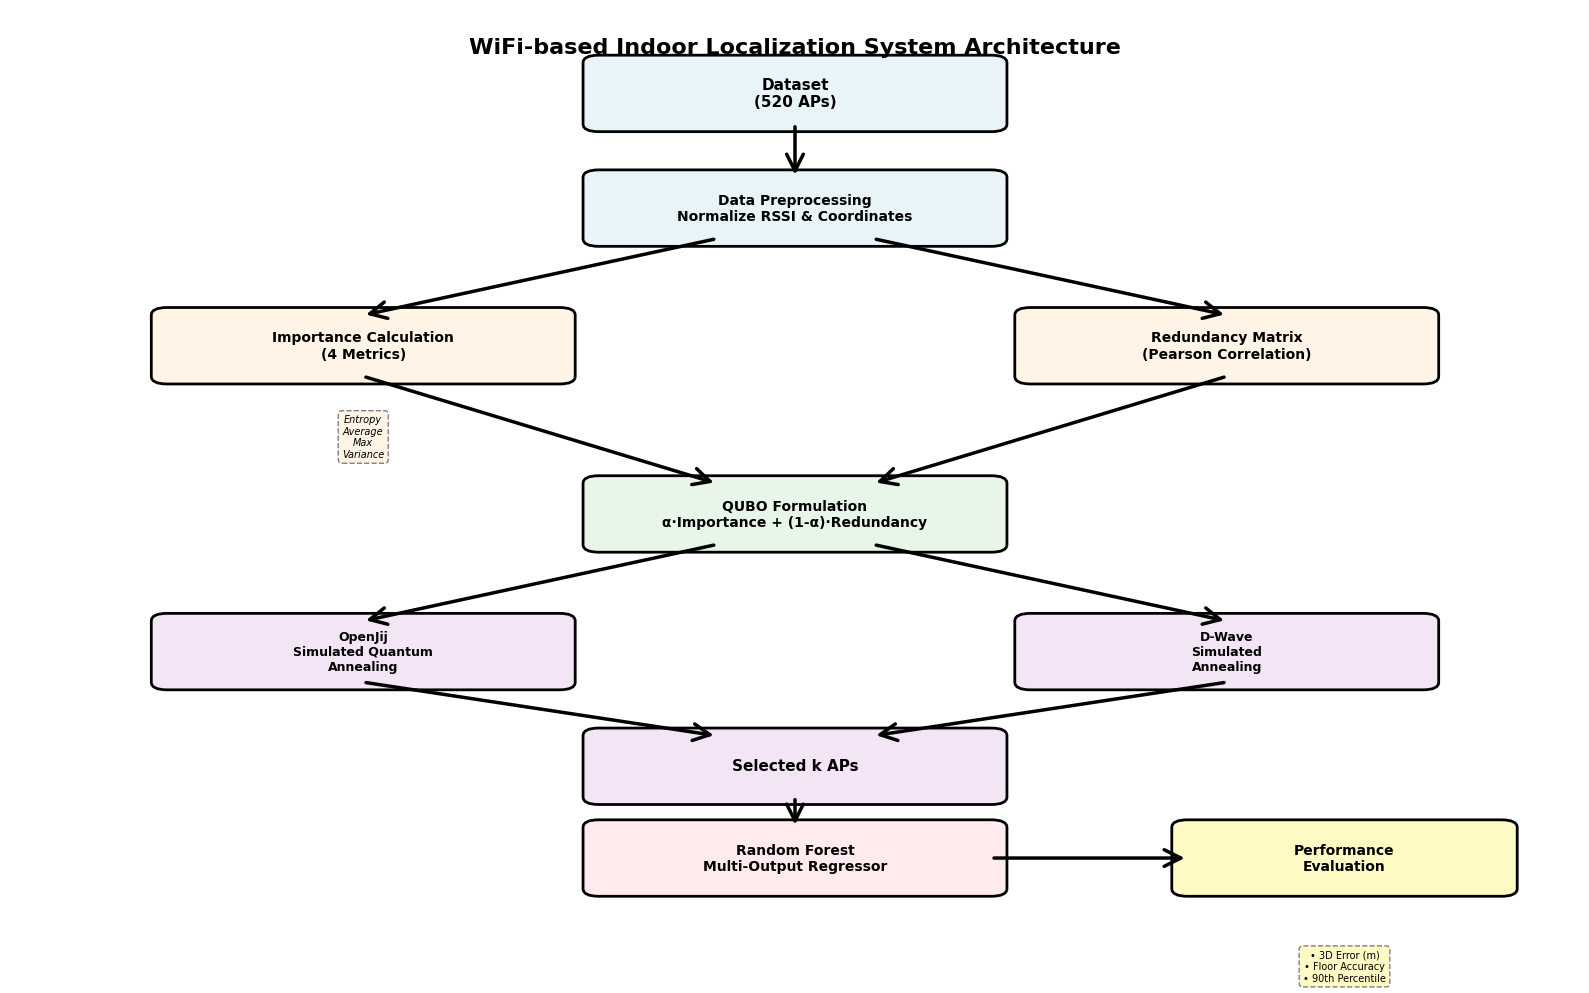

✓ Pipeline architecture saved as 'architecture_pipeline.png' and 'architecture_pipeline.pdf'


In [5]:
def create_pipeline_architecture():
    """
    Create high-level pipeline architecture diagram
    """
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')
    
    # Color scheme
    color_input = '#E8F4F8'  # Light blue
    color_importance = '#FFF4E6'  # Light orange
    color_qubo = '#E8F5E9'  # Light green
    color_solver = '#F3E5F5'  # Light purple
    color_ml = '#FFEBEE'  # Light red
    color_eval = '#FFF9C4'  # Light yellow
    
    box_width = 2.5
    box_height = 0.8
    
    # Helper function to draw boxes
    def draw_box(x, y, width, height, text, color, fontsize=10, fontweight='bold'):
        box = FancyBboxPatch((x, y), width, height, 
                            boxstyle="round,pad=0.1", 
                            edgecolor='black', 
                            facecolor=color,
                            linewidth=2)
        ax.add_patch(box)
        ax.text(x + width/2, y + height/2, text, 
               ha='center', va='center', 
               fontsize=fontsize, fontweight=fontweight,
               wrap=True)
        return box
    
    # Helper function to draw arrows
    def draw_arrow(x1, y1, x2, y2, label=''):
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle='->', 
                               mutation_scale=30, 
                               linewidth=2.5,
                               color='black')
        ax.add_patch(arrow)
        if label:
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            ax.text(mid_x + 0.3, mid_y, label, 
                   fontsize=8, style='italic',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none'))
    
    # Stage 1: Data Input
    y_start = 10.5
    draw_box(3.75, y_start, box_width, box_height, 
             'Dataset\n(520 APs)', color_input, fontsize=11)
    
    # Stage 2: Preprocessing
    y_preprocess = 9.0
    draw_box(3.75, y_preprocess, box_width, box_height, 
             'Data Preprocessing\nNormalize RSSI & Coordinates', color_input, fontsize=10)
    draw_arrow(5, y_start, 5, y_preprocess + box_height)
    
    # Stage 3: Parallel Processing - Importance and Redundancy
    y_parallel = 7.2
    
    # Importance Calculation
    draw_box(1, y_parallel, box_width, box_height, 
             'Importance Calculation\n(4 Metrics)', color_importance, fontsize=10)
    
    # Redundancy Calculation
    draw_box(6.5, y_parallel, box_width, box_height, 
             'Redundancy Matrix\n(Pearson Correlation)', color_importance, fontsize=10)
    
    # Arrows from preprocessing
    draw_arrow(4.5, y_preprocess, 2.25, y_parallel + box_height)
    draw_arrow(5.5, y_preprocess, 7.75, y_parallel + box_height)
    
    # Add importance methods detail box
    ax.text(2.25, y_parallel - 0.5, 
           'Entropy\nAverage\nMax\nVariance',
           ha='center', va='top', fontsize=7, 
           style='italic',
           bbox=dict(boxstyle='round,pad=0.4', 
                    facecolor='#FFF4E6', 
                    edgecolor='gray', 
                    linestyle='dashed',
                    linewidth=1))
    
    # Stage 4: QUBO Formulation
    y_qubo = 5.0
    draw_box(3.75, y_qubo, box_width, box_height, 
             'QUBO Formulation\nα·Importance + (1-α)·Redundancy', color_qubo, fontsize=10)
    
    # Arrows to QUBO
    draw_arrow(2.25, y_parallel, 4.5, y_qubo + box_height)
    draw_arrow(7.75, y_parallel, 5.5, y_qubo + box_height)
    
    # Stage 5: Solvers (Parallel)
    y_solver = 3.2
    
    # OpenJij Solver
    draw_box(1, y_solver, box_width, box_height, 
             'OpenJij\nSimulated Quantum\nAnnealing', color_solver, fontsize=9)
    
    # D-Wave SA Solver
    draw_box(6.5, y_solver, box_width, box_height, 
             'D-Wave\nSimulated\nAnnealing', color_solver, fontsize=9)
    
    # Arrows to solvers
    draw_arrow(4.5, y_qubo, 2.25, y_solver + box_height)
    draw_arrow(5.5, y_qubo, 7.75, y_solver + box_height)
    
    # Stage 6: Selected APs
    y_selected = 1.7
    draw_box(3.75, y_selected, box_width, box_height, 
             'Selected k APs', color_solver, fontsize=11)
    
    # Arrows from solvers
    draw_arrow(2.25, y_solver, 4.5, y_selected + box_height)
    draw_arrow(7.75, y_solver, 5.5, y_selected + box_height)
    
    # Stage 7: ML Training
    y_ml = 0.5
    draw_box(3.75, y_ml, box_width, box_height, 
             'Random Forest\nMulti-Output Regressor', color_ml, fontsize=10)
    draw_arrow(5, y_selected, 5, y_ml + box_height)
    
    # Stage 8: Evaluation (on the side)
    x_eval = 7.5
    y_eval_center = 0.9
    eval_box = draw_box(x_eval, y_eval_center - 0.4, 2.0, 0.8, 
             'Performance\nEvaluation', color_eval, fontsize=10)
    
    # Arrow from ML to evaluation
    draw_arrow(6.25, y_ml + box_height/2, x_eval, y_eval_center)
    
    # Metrics text
    ax.text(8.5, y_eval_center - 1.2, 
           '• 3D Error (m)\n• Floor Accuracy\n• 90th Percentile',
           ha='center', va='top', fontsize=7,
           bbox=dict(boxstyle='round,pad=0.4', 
                    facecolor='#FFF9C4', 
                    edgecolor='gray', 
                    linestyle='dashed',
                    linewidth=1))
    
    # Add title
    ax.text(5, 11.5, 'WiFi-based Indoor Localization System Architecture', 
           ha='center', va='center', 
           fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    return fig

# Generate the figure
fig1 = create_pipeline_architecture()
plt.savefig('architecture_pipeline.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('architecture_pipeline.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Pipeline architecture saved as 'architecture_pipeline.png' and 'architecture_pipeline.pdf'")

## Architecture 2: QUBO Formulation Detail

This diagram focuses on the QUBO formulation and optimization process.

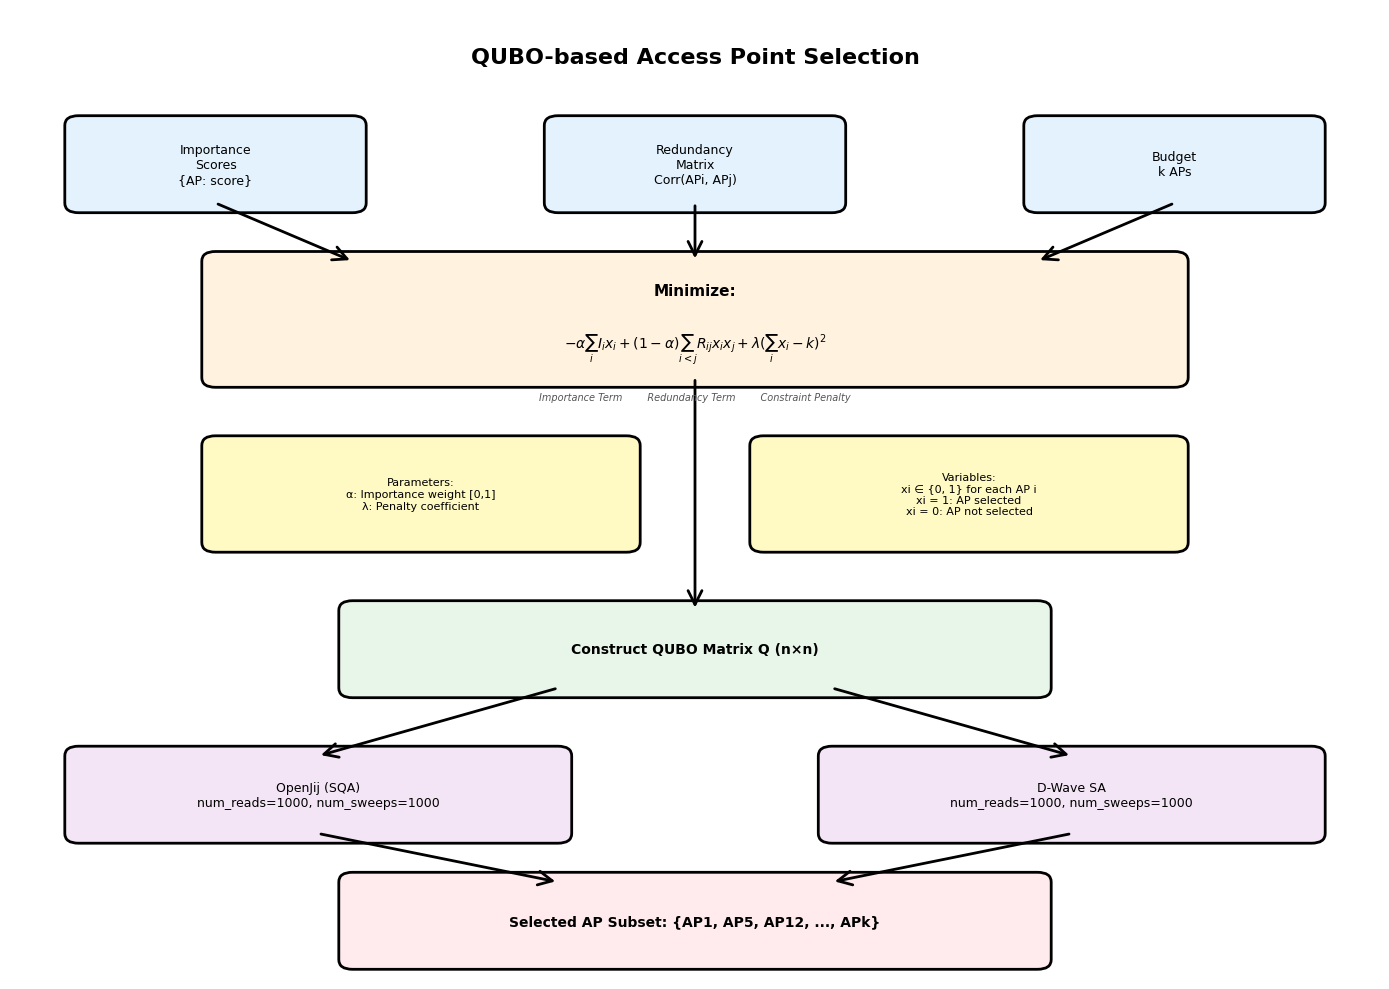

✓ QUBO architecture saved as 'architecture_qubo.png' and 'architecture_qubo.pdf'


In [3]:
def create_qubo_architecture():
    """
    Create detailed QUBO formulation architecture
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Color scheme
    color_input = '#E3F2FD'
    color_qubo = '#E8F5E9'
    color_formula = '#FFF3E0'
    color_solver = '#F3E5F5'
    color_output = '#FFEBEE'
    
    def draw_box(x, y, width, height, text, color, fontsize=10, fontweight='normal'):
        box = FancyBboxPatch((x, y), width, height, 
                            boxstyle="round,pad=0.1", 
                            edgecolor='black', 
                            facecolor=color,
                            linewidth=2)
        ax.add_patch(box)
        ax.text(x + width/2, y + height/2, text, 
               ha='center', va='center', 
               fontsize=fontsize, fontweight=fontweight)
        return box
    
    def draw_arrow(x1, y1, x2, y2, label='', style='->'):
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle=style, 
                               mutation_scale=25, 
                               linewidth=2,
                               color='black')
        ax.add_patch(arrow)
        if label:
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            ax.text(mid_x + 0.2, mid_y, label, 
                   fontsize=8, style='italic',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none'))
    
    # Title
    ax.text(5, 9.5, 'QUBO-based Access Point Selection', 
           ha='center', va='center', 
           fontsize=16, fontweight='bold')
    
    # Input boxes at top
    y_input = 8.0
    draw_box(0.5, y_input, 2.0, 0.8, 'Importance\nScores\n{AP: score}', color_input, fontsize=9)
    draw_box(4.0, y_input, 2.0, 0.8, 'Redundancy\nMatrix\nCorr(APi, APj)', color_input, fontsize=9)
    draw_box(7.5, y_input, 2.0, 0.8, 'Budget\nk APs', color_input, fontsize=9)
    
    # QUBO Objective Function (center)
    y_objective = 6.2
    obj_box = draw_box(1.5, y_objective, 7.0, 1.2, '', color_formula, fontsize=10)
    
    # Mathematical formula
    formula_text = r'Minimize:'
    ax.text(5, y_objective + 0.9, formula_text, 
           ha='center', va='center', fontsize=11, fontweight='bold')
    
    formula_main = r'$-\alpha \sum_{i} I_i x_i + (1-\alpha) \sum_{i<j} R_{ij} x_i x_j + \lambda(\sum_i x_i - k)^2$'
    ax.text(5, y_objective + 0.3, formula_main, 
           ha='center', va='center', fontsize=10)
    
    # Component labels
    ax.text(5, y_objective - 0.2, 
           'Importance Term        Redundancy Term        Constraint Penalty',
           ha='center', va='center', fontsize=7, style='italic', color='#555')
    
    # Arrows from inputs to objective
    draw_arrow(1.5, y_input, 2.5, y_objective + 1.2)
    draw_arrow(5.0, y_input, 5.0, y_objective + 1.2)
    draw_arrow(8.5, y_input, 7.5, y_objective + 1.2)
    
    # Parameters box
    y_params = 4.5
    draw_box(1.5, y_params, 3.0, 1.0, 
             'Parameters:\nα: Importance weight [0,1]\nλ: Penalty coefficient',
             '#FFF9C4', fontsize=8)
    
    # Binary variables box
    draw_box(5.5, y_params, 3.0, 1.0, 
             'Variables:\nxi ∈ {0, 1} for each AP i\nxi = 1: AP selected\nxi = 0: AP not selected',
             '#FFF9C4', fontsize=8)
    
    # QUBO Matrix construction
    y_matrix = 3.0
    draw_box(2.5, y_matrix, 5.0, 0.8, 
             'Construct QUBO Matrix Q (n×n)',
             color_qubo, fontsize=10, fontweight='bold')
    
    draw_arrow(5, y_objective, 5, y_matrix + 0.8)
    
    # Solvers
    y_solvers = 1.5
    draw_box(0.5, y_solvers, 3.5, 0.8, 
             'OpenJij (SQA)\nnum_reads=1000, num_sweeps=1000',
             color_solver, fontsize=9)
    
    draw_box(6.0, y_solvers, 3.5, 0.8, 
             'D-Wave SA\nnum_reads=1000, num_sweeps=1000',
             color_solver, fontsize=9)
    
    # Arrows to solvers
    draw_arrow(4.0, y_matrix, 2.25, y_solvers + 0.8)
    draw_arrow(6.0, y_matrix, 7.75, y_solvers + 0.8)
    
    # Output
    y_output = 0.2
    draw_box(2.5, y_output, 5.0, 0.8, 
             'Selected AP Subset: {AP1, AP5, AP12, ..., APk}',
             color_output, fontsize=10, fontweight='bold')
    
    # Arrows to output
    draw_arrow(2.25, y_solvers, 4.0, y_output + 0.8)
    draw_arrow(7.75, y_solvers, 6.0, y_output + 0.8)
    
    plt.tight_layout()
    return fig

# Generate the figure
fig2 = create_qubo_architecture()
plt.savefig('architecture_qubo.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('architecture_qubo.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print("✓ QUBO architecture saved as 'architecture_qubo.png' and 'architecture_qubo.pdf'")

## Architecture 3: Modular System Components

This diagram shows the modular breakdown of the system with file/module names.

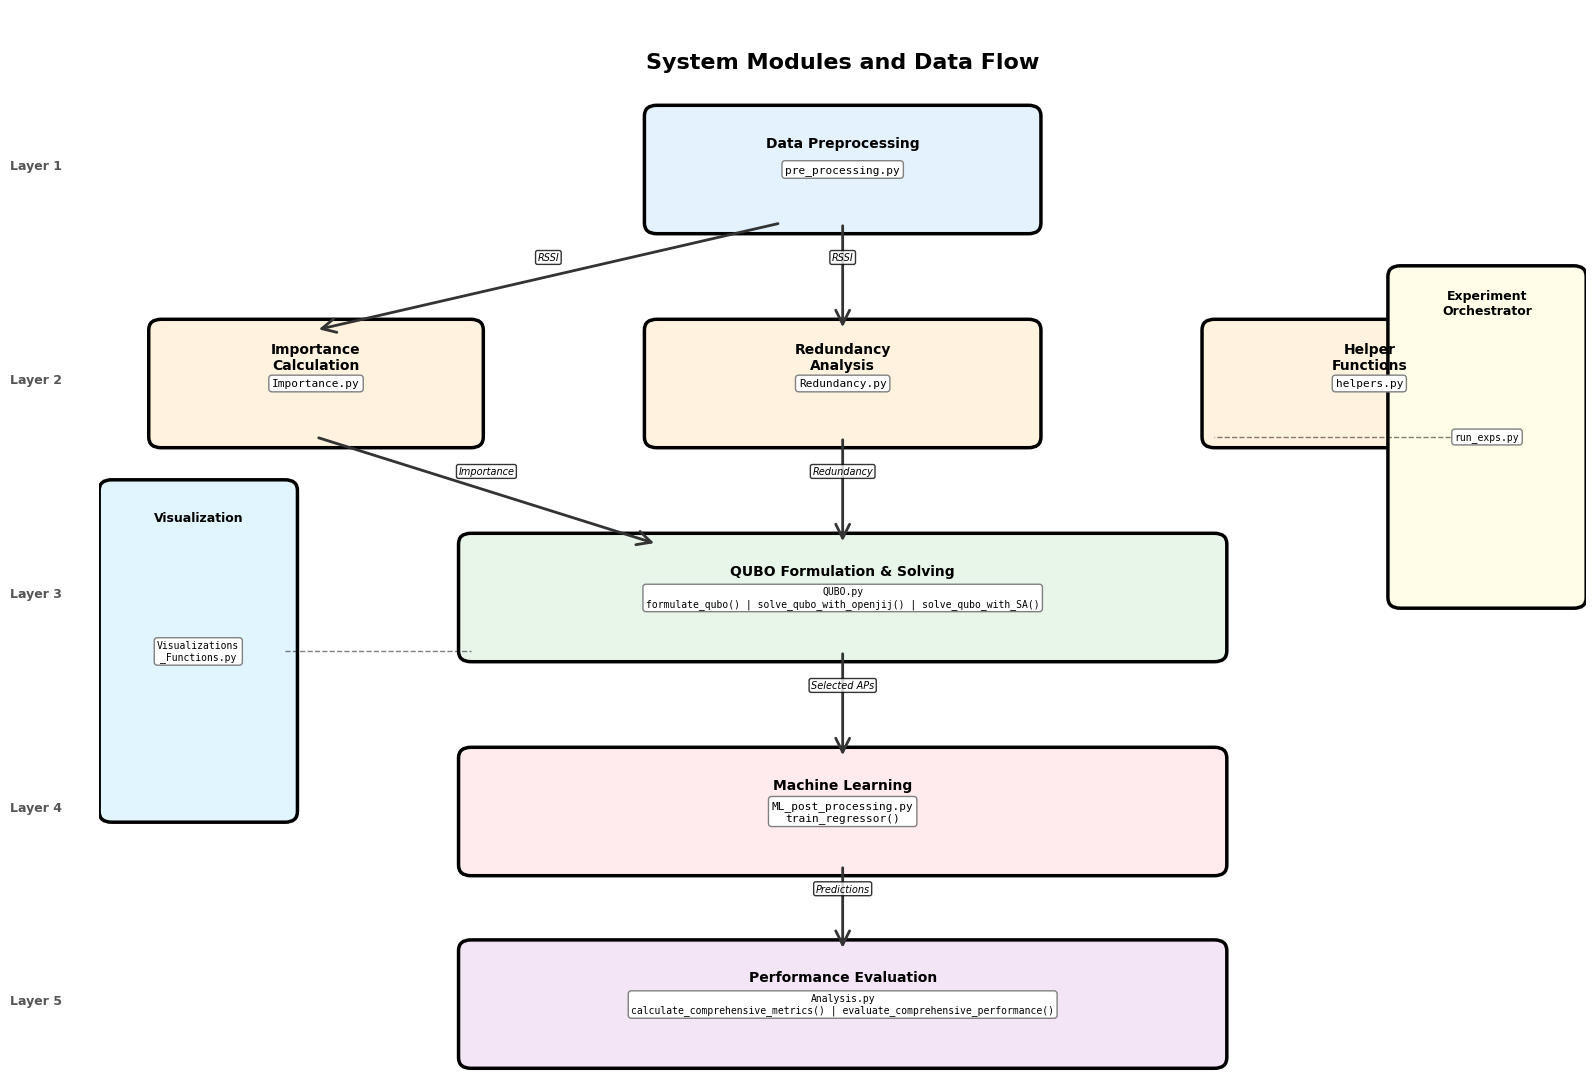

✓ Modular architecture saved as 'architecture_modular.png' and 'architecture_modular.pdf'


In [4]:
def create_modular_architecture():
    """
    Create modular component architecture with file names
    """
    fig, ax = plt.subplots(figsize=(16, 11))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Colors for different layers
    color_data = '#E3F2FD'
    color_feature = '#FFF3E0'
    color_optimization = '#E8F5E9'
    color_ml = '#FFEBEE'
    color_evaluation = '#F3E5F5'
    
    def draw_module_box(x, y, width, height, title, module, color, fontsize_title=10, fontsize_module=8):
        # Outer box
        box = FancyBboxPatch((x, y), width, height, 
                            boxstyle="round,pad=0.1", 
                            edgecolor='black', 
                            facecolor=color,
                            linewidth=2.5)
        ax.add_patch(box)
        
        # Title
        ax.text(x + width/2, y + height - 0.25, title, 
               ha='center', va='center', 
               fontsize=fontsize_title, fontweight='bold')
        
        # Module name
        ax.text(x + width/2, y + height/2, module, 
               ha='center', va='center', 
               fontsize=fontsize_module, 
               family='monospace',
               bbox=dict(boxstyle='round,pad=0.3', 
                        facecolor='white', 
                        edgecolor='gray',
                        linewidth=1))
        
        return box
    
    def draw_arrow(x1, y1, x2, y2, label=''):
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle='->', 
                               mutation_scale=25, 
                               linewidth=2,
                               color='#333')
        ax.add_patch(arrow)
        if label:
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            ax.text(mid_x, mid_y + 0.15, label, 
                   fontsize=7, style='italic', ha='center',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    
    # Title
    ax.text(6, 9.5, 'System Modules and Data Flow', 
           ha='center', va='center', 
           fontsize=16, fontweight='bold')
    
    # Layer 1: Data Layer
    y_data = 8.0
    draw_module_box(4.5, y_data, 3.0, 1.0, 
                   'Data Preprocessing', 
                   'pre_processing.py',
                   color_data)
    
    # Layer 2: Feature Engineering (parallel)
    y_feature = 6.0
    
    draw_module_box(0.5, y_feature, 2.5, 1.0, 
                   'Importance\nCalculation', 
                   'Importance.py',
                   color_feature)
    
    draw_module_box(4.5, y_feature, 3.0, 1.0, 
                   'Redundancy\nAnalysis', 
                   'Redundancy.py',
                   color_feature)
    
    draw_module_box(9.0, y_feature, 2.5, 1.0, 
                   'Helper\nFunctions', 
                   'helpers.py',
                   color_feature)
    
    # Arrows from data to features
    draw_arrow(5.5, y_data, 1.75, y_feature + 1.0, 'RSSI')
    draw_arrow(6.0, y_data, 6.0, y_feature + 1.0, 'RSSI')
    
    # Layer 3: Optimization
    y_opt = 4.0
    draw_module_box(3.0, y_opt, 6.0, 1.0, 
                   'QUBO Formulation & Solving', 
                   'QUBO.py\nformulate_qubo() | solve_qubo_with_openjij() | solve_qubo_with_SA()',
                   color_optimization, fontsize_module=7)
    
    # Arrows to optimization
    draw_arrow(1.75, y_feature, 4.5, y_opt + 1.0, 'Importance')
    draw_arrow(6.0, y_feature, 6.0, y_opt + 1.0, 'Redundancy')
    
    # Layer 4: Machine Learning
    y_ml = 2.0
    draw_module_box(3.0, y_ml, 6.0, 1.0, 
                   'Machine Learning', 
                   'ML_post_processing.py\ntrain_regressor()',
                   color_ml)
    
    draw_arrow(6.0, y_opt, 6.0, y_ml + 1.0, 'Selected APs')
    
    # Layer 5: Evaluation
    y_eval = 0.2
    draw_module_box(3.0, y_eval, 6.0, 1.0, 
                   'Performance Evaluation', 
                   'Analysis.py\ncalculate_comprehensive_metrics() | evaluate_comprehensive_performance()',
                   color_evaluation, fontsize_module=7)
    
    draw_arrow(6.0, y_ml, 6.0, y_eval + 1.0, 'Predictions')
    
    # Side: Orchestration
    x_orch = 10.5
    draw_module_box(x_orch, 4.5, 1.4, 3.0, 
                   'Experiment\nOrchestrator', 
                   'run_exps.py',
                   '#FFFDE7', fontsize_title=9, fontsize_module=7)
    
    # Side: Visualization
    x_vis = 0.1
    draw_module_box(x_vis, 2.5, 1.4, 3.0, 
                   'Visualization', 
                   'Visualizations\n_Functions.py',
                   '#E1F5FE', fontsize_title=9, fontsize_module=7)
    
    # Connection lines (dashed) for side modules
    ax.plot([x_orch + 0.7, 9.0], [6.0, 6.0], 'k--', linewidth=1, alpha=0.5)
    ax.plot([x_vis + 1.4, 3.0], [4.0, 4.0], 'k--', linewidth=1, alpha=0.5)
    
    # Add layer labels on the left
    label_x = -0.3
    ax.text(label_x, y_data + 0.5, 'Layer 1', fontsize=9, fontweight='bold', 
           rotation=0, ha='right', color='#555')
    ax.text(label_x, y_feature + 0.5, 'Layer 2', fontsize=9, fontweight='bold', 
           rotation=0, ha='right', color='#555')
    ax.text(label_x, y_opt + 0.5, 'Layer 3', fontsize=9, fontweight='bold', 
           rotation=0, ha='right', color='#555')
    ax.text(label_x, y_ml + 0.5, 'Layer 4', fontsize=9, fontweight='bold', 
           rotation=0, ha='right', color='#555')
    ax.text(label_x, y_eval + 0.5, 'Layer 5', fontsize=9, fontweight='bold', 
           rotation=0, ha='right', color='#555')
    
    plt.tight_layout()
    return fig

# Generate the figure
fig3 = create_modular_architecture()
plt.savefig('architecture_modular.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('architecture_modular.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Modular architecture saved as 'architecture_modular.png' and 'architecture_modular.pdf'")

## Architecture 4: Compact Flowchart (Alternative)

A more compact version suitable for papers with space constraints.

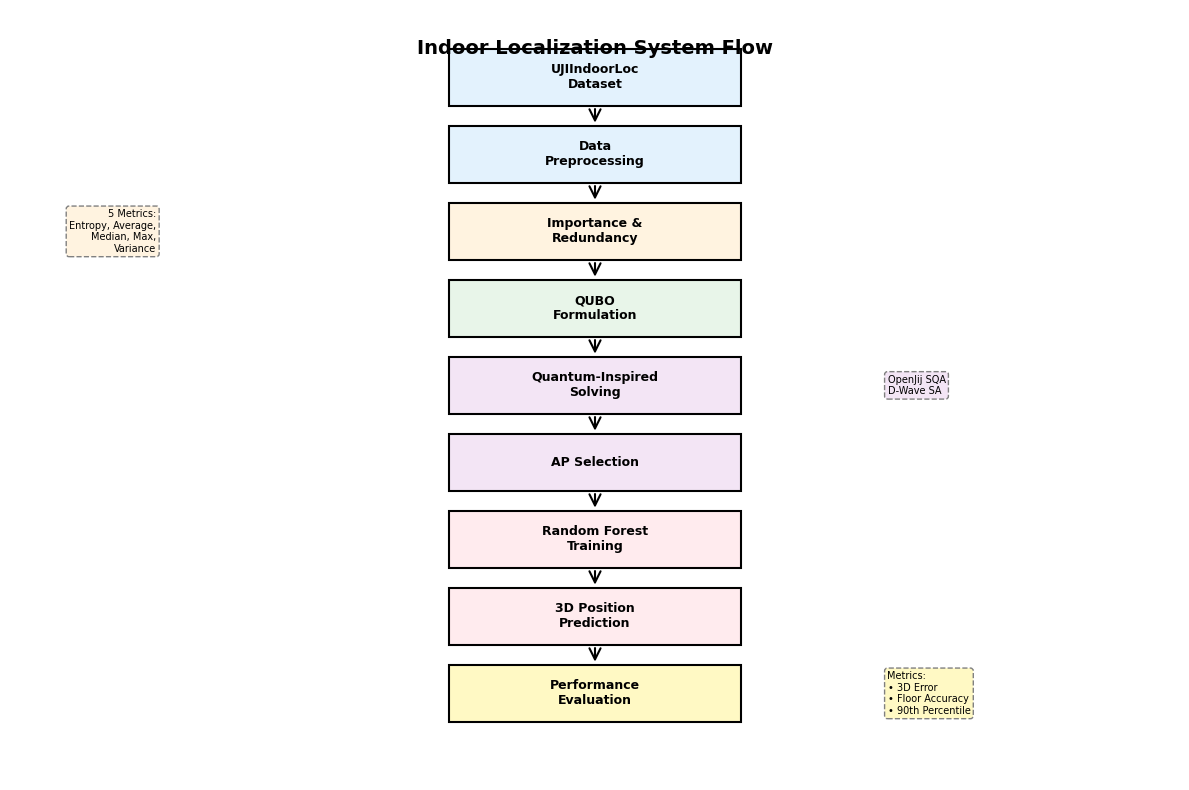

✓ Compact flowchart saved as 'architecture_compact.png' and 'architecture_compact.pdf'


In [5]:
def create_compact_flowchart():
    """
    Create a compact flowchart for space-constrained publications
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 8)
    ax.axis('off')
    
    def draw_box(x, y, width, height, text, color='#E3F2FD', fontsize=9):
        box = Rectangle((x, y), width, height, 
                       edgecolor='black', 
                       facecolor=color,
                       linewidth=1.5)
        ax.add_patch(box)
        ax.text(x + width/2, y + height/2, text, 
               ha='center', va='center', 
               fontsize=fontsize, fontweight='bold')
    
    def draw_arrow(x1, y1, x2, y2):
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                               arrowstyle='->', 
                               mutation_scale=20, 
                               linewidth=1.5,
                               color='black')
        ax.add_patch(arrow)
    
    # Compact vertical flow
    x_center = 4.5
    box_w = 3.0
    box_h = 0.6
    
    stages = [
        (7.0, 'UJIIndoorLoc\nDataset', '#E3F2FD'),
        (6.2, 'Data\nPreprocessing', '#E3F2FD'),
        (5.4, 'Importance &\nRedundancy', '#FFF3E0'),
        (4.6, 'QUBO\nFormulation', '#E8F5E9'),
        (3.8, 'Quantum-Inspired\nSolving', '#F3E5F5'),
        (3.0, 'AP Selection', '#F3E5F5'),
        (2.2, 'Random Forest\nTraining', '#FFEBEE'),
        (1.4, '3D Position\nPrediction', '#FFEBEE'),
        (0.6, 'Performance\nEvaluation', '#FFF9C4'),
    ]
    
    for i, (y, text, color) in enumerate(stages):
        draw_box(x_center, y, box_w, box_h, text, color)
        if i < len(stages) - 1:
            draw_arrow(x_center + box_w/2, y, x_center + box_w/2, stages[i+1][0] + box_h)
    
    # Side annotations
    # Importance methods
    ax.text(1.5, 5.4 + box_h/2, 
           '5 Metrics:\nEntropy, Average,\nMedian, Max,\nVariance',
           ha='right', va='center', fontsize=7,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFF3E0', 
                    edgecolor='gray', linestyle='--', linewidth=1))
    
    # Solvers
    ax.text(9.0, 3.8 + box_h/2, 
           'OpenJij SQA\nD-Wave SA',
           ha='left', va='center', fontsize=7,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='#F3E5F5', 
                    edgecolor='gray', linestyle='--', linewidth=1))
    
    # Metrics
    ax.text(9.0, 0.6 + box_h/2, 
           'Metrics:\n• 3D Error\n• Floor Accuracy\n• 90th Percentile',
           ha='left', va='center', fontsize=7,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFF9C4', 
                    edgecolor='gray', linestyle='--', linewidth=1))
    
    # Title
    ax.text(6, 7.6, 'Indoor Localization System Flow', 
           ha='center', va='center', 
           fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig

# Generate the figure
fig4 = create_compact_flowchart()
plt.savefig('architecture_compact.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('architecture_compact.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Compact flowchart saved as 'architecture_compact.png' and 'architecture_compact.pdf'")

## Summary

Four architecture diagrams have been created:

1. **`architecture_pipeline.png/pdf`**: Complete high-level system pipeline showing all stages from data input to evaluation

2. **`architecture_qubo.png/pdf`**: Detailed QUBO formulation and optimization process with mathematical notation

3. **`architecture_modular.png/pdf`**: Modular breakdown showing Python modules and their interactions

4. **`architecture_compact.png/pdf`**: Compact vertical flowchart for space-constrained publications

All diagrams are saved in both PNG (high resolution, 300 DPI) and PDF (vector format) for flexibility in your research paper.